In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
# 상대경로로 CSV 읽어오기
file_path = '../../training_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   Unnamed: 0  leverage_ratio  asset_liabilities    roe  asset_turnover  \
0           1          14.933           1.067048  0.107           0.081   
1           2          14.734           1.067941  0.117           0.085   
2           3          15.294           1.065449  0.137           0.085   
3           4          13.652           1.072060  0.167           0.097   
4           5          13.390           1.071841  0.151           0.106   

   debt_ratio  debt_ratio2    roa  capitalization_ratio  longtermdebt_invcap  \
0       0.937        0.043  0.018                 0.244                0.244   
1       0.936        0.041  0.020                 0.230                0.230   
2       0.939        0.049  0.021                 0.317                0.317   
3       0.932        0.070  0.025                 0.272                0.298   
4       0.930        0.071  0.023                 0.244                0.264   

   totaldebt_invcap  cash_debt  debt_ebitda  rect_turn  label  
0   

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# X, y 분리
X = df.drop('label', axis=1)
y = df['label']

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9818283477774672
Confusion Matrix:
 [[3512    0]
 [  65    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3512
           1       0.00      0.00      0.00        65

    accuracy                           0.98      3577
   macro avg       0.49      0.50      0.50      3577
weighted avg       0.96      0.98      0.97      3577



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565

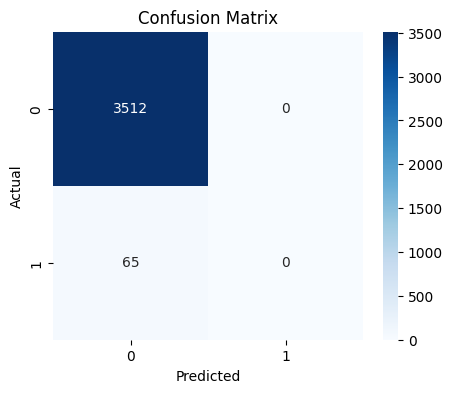

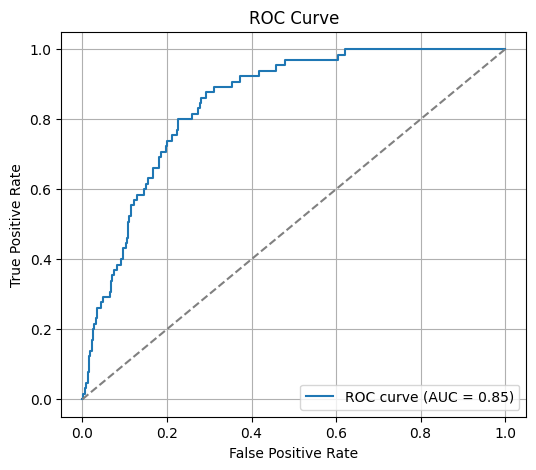

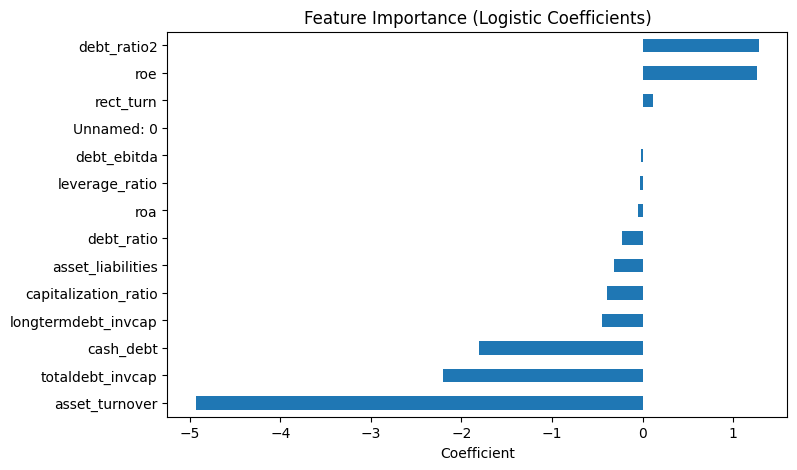

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Coefficient 시각화
coef = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8,5))
coef.sort_values().plot(kind='barh')
plt.title('Feature Importance (Logistic Coefficients)')
plt.xlabel('Coefficient')
plt.show()